<a href="https://colab.research.google.com/github/Dansah2/Udacity_Tutorials/blob/main/Udacity_NLP_LSTM_Subwords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
      import tensorflow as tf
      from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# get the dataset
!wget --no-check-certificate \
    https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P -O /tmp/sentiment.csv

--2023-06-30 23:04:31--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 142.251.2.102, 142.251.2.139, 142.251.2.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/muc286r382jj2ejasdgncfi5vqi0uv4k/1688166225000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=cc5d0f60-861f-4448-8983-69ba178f0aa7 [following]
--2023-06-30 23:04:31--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/muc286r382jj2ejasdgncfi5vqi0uv4k/1688166225000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=cc5d0f60-861f-4448-8983-69ba178f0aa7
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to doc-08-ak-d

In [3]:
import pandas as pd

# read the data into a pandas dataset
dataset = pd.read_csv('/tmp/sentiment.csv')

# define sentences and labels
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

In [4]:
#print some examples
for x in range(2):
  print(sentences[x])
  print(labels[x])
  print

So there is no way for me to plug it in here in the US unless I go by a converter.
0
Good case Excellent value.
1


In [5]:
import tensorflow_datasets as tfds

vocab_size = 1000
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentences, vocab_size, max_subword_length=5)

# check the vocab size
print(f'The vocab size is: {tokenizer.vocab_size}')

The vocab size is: 999


In [6]:
# make sure the tokenizer works properly
num = 5
print(sentences[num])
encoded = tokenizer.encode(sentences[num])
print(encoded)

I have to jiggle the plug to get it to line up right to get decent volume.
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]


In [7]:
# separately print out each subword decoded
for i in encoded:
  print(tokenizer.decode([i]))

I 
have 
to 
j
ig
gl
e 
the 
pl
ug
 
to 
get 
it 
to 
li
ne 
up 
right
 
to 
get 
dec
ent 
vo
lu
me
.


In [8]:
# replace the sentence data with encoded subwords
for i, sentence in enumerate(sentences):
  sentences[i] = tokenizer.encode(sentence)

In [9]:
# confirm that the sentences have been replaced
print(sentences[5])

[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]


In [10]:
# final preprocessing
import numpy as np

max_length = 50
trunc_type = 'post'
padding_type = 'post'

# pad the sequences
sequences_padded = pad_sequences(sentences, maxlen=max_length,
                                 padding=padding_type, truncating=trunc_type)

# separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sequences = sequences_padded[0:training_size]
training_labels = labels[0:training_size:]
testing_sequences = sequences_padded[training_size:]
testing_labels = labels[training_size:]

# make labels into numpy arrays for final use
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [11]:
# create the model

embedding_dim = 16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 16,109
Trainable params: 16,109
Non-trainable params: 0
_________________________________________________________________


In [12]:
# set number of epochs
num_epochs = 30

# compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the model
history = model.fit(training_sequences, training_labels_final, epochs=num_epochs, validation_data=(testing_sequences, testing_labels_final))

Epoch 1/30
50/50 [==============================] - 3s 22ms/step - loss: 0.6925 - accuracy: 0.5104 - val_loss: 0.6967 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 1s 11ms/step - loss: 0.6884 - accuracy: 0.5399 - val_loss: 0.6995 - val_accuracy: 0.4361
Epoch 3/30
50/50 [==============================] - 1s 14ms/step - loss: 0.6815 - accuracy: 0.5825 - val_loss: 0.6920 - val_accuracy: 0.4962
Epoch 4/30
50/50 [==============================] - 0s 10ms/step - loss: 0.6693 - accuracy: 0.6265 - val_loss: 0.6803 - val_accuracy: 0.5414
Epoch 5/30
50/50 [==============================] - 0s 10ms/step - loss: 0.6509 - accuracy: 0.6748 - val_loss: 0.6688 - val_accuracy: 0.5589
Epoch 6/30
50/50 [==============================] - 0s 7ms/step - loss: 0.6250 - accuracy: 0.7326 - val_loss: 0.6423 - val_accuracy: 0.6867
Epoch 7/30
50/50 [==============================] - 0s 6ms/step - loss: 0.5920 - accuracy: 0.7928 - val_loss: 0.6259 - val_accuracy: 0.6817
Epoch 8/30
50/5

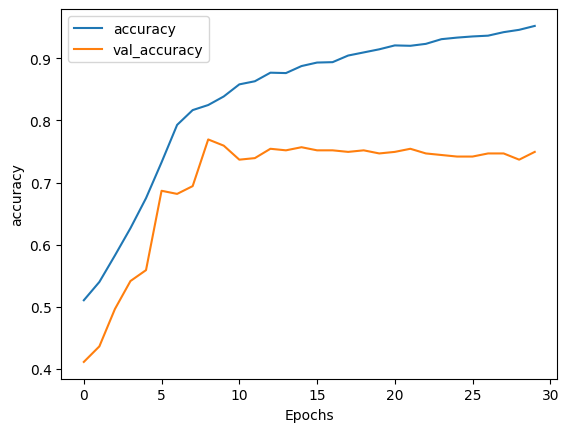

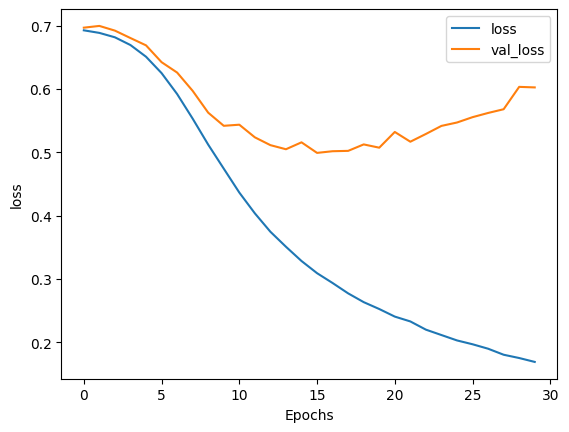

In [13]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [17]:
from math import trunc
# create a function that receives rewiews and predicts the sentiment

def predict_review(model, new_sentences, maxlen=max_length, show_padded_sequence=True):
  # create an array to hold encoded sequences
  new_sequences = []

  # convert the new reviews into sequences
  for i, frvw in enumerate(new_sentences):
    new_sequences.append(tokenizer.encode(frvw))

  trunc_type = 'post'
  padding_type = 'post'

  # pad all sequences for the new reviews
  new_reviews_padded = pad_sequences(new_sequences, maxlen=max_length,
                                     padding=padding_type, truncating=trunc_type)

  classes = model.predict(new_reviews_padded)

  for x in range(len(new_sentences)):
    # print the sequence
    if (show_padded_sequence):
      print(new_reviews_padded[x])

    # print the review as a test
    print(new_sentences[x])

    # print its predicted class
    print(classes[x])
    print('\n')

In [18]:
# use the model to predict some reviews
fake_reviews = ["I love this phone",
                "Everything was cold",
                "Everything was hot exactly as I wanted",
                "Everything was green",
                "the host seated us immediately",
                "they gave us free chocolate cake",
                "we couldn't hear each other talk because of the shouting in the kitchen"
              ]
type(fake_reviews)
predict_review(model, fake_reviews)

1/1 [==============================] - 0s 95ms/step
[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.9000723]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.09083138]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.33220318]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything 

In [23]:
# define fuction that will take in models with different layers
# and return predictions

def fit_model_now(model, sentences):
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  history = model.fit(training_sequences, training_labels_final, epochs=num_epochs,
                      validation_data=(testing_sequences, testing_labels_final))
  return history

def plot_results(history):
  plot_graphs(history, 'accuracy')
  plot_graphs(history, 'loss')

def fit_model_and_show_results(model, sentences):
  history = fit_model_now(model, sentences)
  plot_results(history)
  predict_review(model, sentences)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 16)            16000     
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)               4224      
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 6)                 198       
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 20,429
Trainable params: 20,429
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
50/50 [==============================] - 8s 66ms/step - loss: 0.6931 - accuracy: 0.5110 - val_loss: 0.693

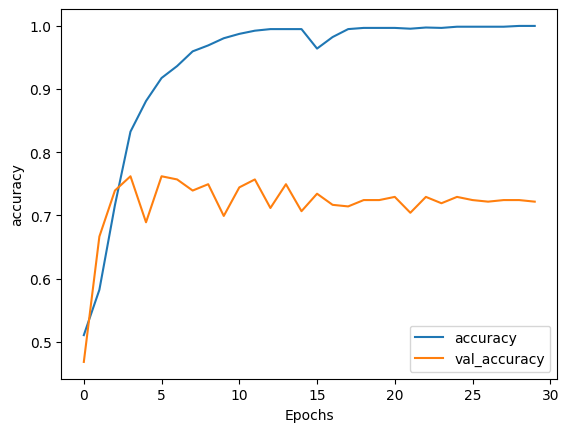

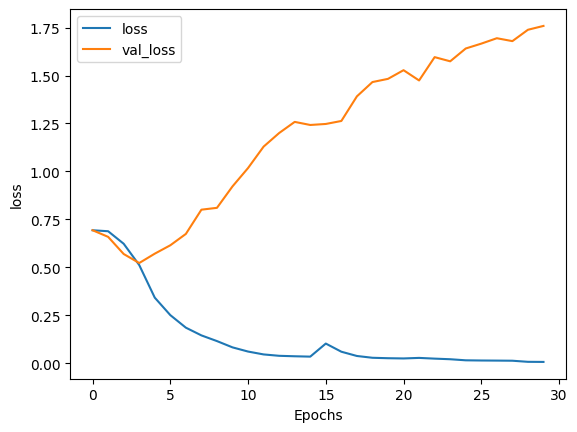

1/1 [==============================] - 1s 805ms/step
[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.99634475]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[4.5035533e-05]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.99503285]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everyt

In [24]:
# define the model
model_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile and train the model
fit_model_and_show_results(model_bidi_lstm, fake_reviews)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 16)            16000     
                                                                 
 bidirectional_3 (Bidirectio  (None, 50, 32)           4224      
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 6)                 198       
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 26,701
Trainable params: 26,701
Non-trai

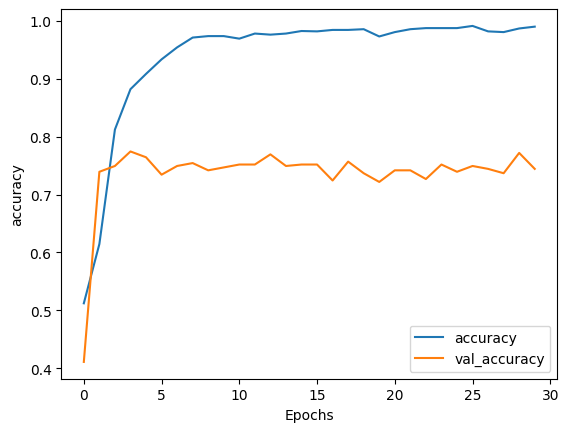

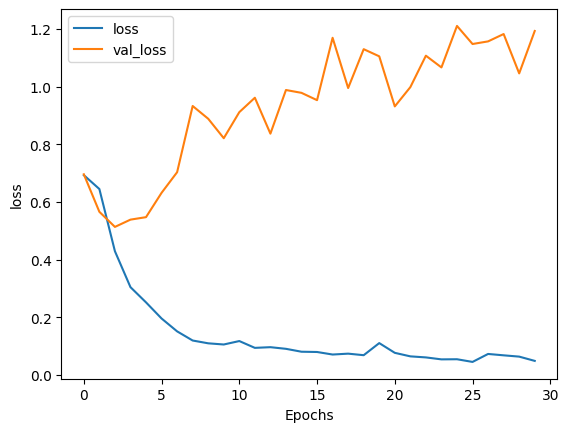

1/1 [==============================] - 2s 2s/step
[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.9993215]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.02019692]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.97510344]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything wa

In [26]:
model_multiple_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,
                                                       return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
fit_model_and_show_results(model_multiple_bidi_lstm, fake_reviews)

In [27]:
# compare and predict for all models
my_reviews = ['lovely', 'dreadful', 'stay away',
              'everything was hot exactly as I wanted it',
              'everything was not exactly as I wanted it',
              'they gave us free chocolate cake',
              "I've never eaten anything so spicy in my life, my throat burned for hours",
              'for a phone that is as expensive as this one I expect it to be much easier to use than this thing is',
              "we left there very full for a low price so I'd say you just can't go wrong at this place",
              "that place does not have quality meals and it isn't a good place to go for dinner"]

In [28]:
print('=================================\m','Embeddings only:\n', '=====================================',)
predict_review(model, my_reviews, show_padded_sequence=False)

=================================\m Embeddings only:
1/1 [==============================] - 0s 52ms/step
lovely
[0.9295115]


dreadful
[0.2742316]


stay away
[0.62636703]


everything was hot exactly as I wanted it
[0.78997153]


everything was not exactly as I wanted it
[0.5673345]


they gave us free chocolate cake
[0.7219253]


I've never eaten anything so spicy in my life, my throat burned for hours
[0.01842864]


for a phone that is as expensive as this one I expect it to be much easier to use than this thing is
[0.6019057]


we left there very full for a low price so I'd say you just can't go wrong at this place
[0.77230203]


that place does not have quality meals and it isn't a good place to go for dinner
[0.8509496]




In [29]:
print('=================================\m','With a single bidirectional LSTM:\n', '=====================================',)
predict_review(model_bidi_lstm, my_reviews, show_padded_sequence=False)

=================================\m With a single bidirectional LSTM:
1/1 [==============================] - 0s 34ms/step
lovely
[0.996033]


dreadful
[0.00053222]


stay away
[0.04432134]


everything was hot exactly as I wanted it
[0.9953087]


everything was not exactly as I wanted it
[0.96572274]


they gave us free chocolate cake
[0.0280513]


I've never eaten anything so spicy in my life, my throat burned for hours
[0.00059314]


for a phone that is as expensive as this one I expect it to be much easier to use than this thing is
[0.9830325]


we left there very full for a low price so I'd say you just can't go wrong at this place
[0.99525195]


that place does not have quality meals and it isn't a good place to go for dinner
[0.8229596]




In [30]:
print('=================================\m','With two bidirectional LSTMs:\n', '=====================================',)
predict_review(model_multiple_bidi_lstm, my_reviews, show_padded_sequence=False)

=================================\m With two bidirectional LSTMs:
1/1 [==============================] - 0s 42ms/step
lovely
[0.9994305]


dreadful
[0.01723574]


stay away
[0.0211836]


everything was hot exactly as I wanted it
[0.99909884]


everything was not exactly as I wanted it
[0.6420332]


they gave us free chocolate cake
[0.9986866]


I've never eaten anything so spicy in my life, my throat burned for hours
[0.01613767]


for a phone that is as expensive as this one I expect it to be much easier to use than this thing is
[0.0174353]


we left there very full for a low price so I'd say you just can't go wrong at this place
[0.01811028]


that place does not have quality meals and it isn't a good place to go for dinner
[0.02441729]


